In [1]:
# Installing Dependencies

!pip install pycountry_convert
!pip install folium
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_deaths.h5
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_confirmed.h5
!pip install keras
!pip install tensorflow
!pip install --upgrade pip

pytest-cov 2.8.1 has requirement pytest>=3.6, but you'll have pytest 3.5.1 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
pytest-cov 2.8.1 has requirement pytest>=3.6, but you'll have pytest 3.5.1 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
--2020-03-29 06:29:02--  https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_deaths.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111008 (108K) [application/octet-stream]
Saving to: ‘model_deaths.h5.3’

model_deaths.h5.3   100%[===================>] 108.41K  --.-KB/s 

pytest-cov 2.8.1 has requirement pytest>=3.6, but you'll have pytest 3.5.1 which is incompatible.
  Found existing installation: wrapt 1.10.11
Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/54/0c/d01aa759fdc501a58f431eb594a17495f15b88da142ce14b5845662c13f3/pip-20.0.2-py2.py3-none-any.whl
pytest-cov 2.8.1 has requirement pytest>=3.6, but you'll have pytest 3.5.1 which is incompatible.
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [2]:
#!pip install tensorflow
!conda install tensorflow --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs: 
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    keras-preprocessing-1.1.0  |             py_1          36 KB
    tensorboard-2.0.0          |     pyhb38c66f_1         3.3 MB
    gast-0.2.2                 |           py36_0         138 KB
    keras-applications-1.0.8   |             py_0          33 KB
    tensorflow-estimator-2.0.0 |     pyh2649769_0         272 KB
    opt_einsum-3.1.0           |             py_0          54 KB
    numpy-base-1.18.1          |   py36hde5b4d6_1         5.2 MB
    termcolor-1.1.0            |           py36_1           7 KB

In [139]:
!pip install imgkit

  Created wheel for imgkit: filename=imgkit-1.0.2-py3-none-any.whl size=6600 sha256=91c4217e7e5747e939980b4d0e3f7a039533d64e3900e473fbb96bd87f7f3304
  Stored in directory: /home/ec2-user/.cache/pip/wheels/ab/97/63/d1aaf14815a0c4979c0c231f25422414d2768d6919e1ffa443
Successfully built imgkit


In [147]:
!pip install wkhtmltopdf

  Created wheel for wkhtmltopdf: filename=wkhtmltopdf-0.2-py3-none-any.whl size=10869 sha256=81fbd2a07874bd37d29b7e86e92a3c764b915870d347f1c7b05bec92653fdd7e
  Stored in directory: /home/ec2-user/.cache/pip/wheels/6a/53/f6/99a798863dc009bedf5b0d607d28e538892d48237a917bc1b5
Successfully built wkhtmltopdf


In [150]:
!pip install main

  ERROR: Command errored out with exit status 1:
   command: /home/ec2-user/anaconda3/envs/python3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-1csl1ek7/main/setup.py'"'"'; __file__='"'"'/tmp/pip-install-1csl1ek7/main/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-08rn1vk7
       cwd: /tmp/pip-install-1csl1ek7/main/
  Complete output (6 lines):
  running bdist_wheel
  running build
  running build_scripts
  creating build
  creating build/scripts-3.6
  error: file '/tmp/pip-install-1csl1ek7/main/main' does not exist
  ----------------------------------------
  ERROR: Failed building wheel for main
  Running setup.py clean for main
Failed to build main
    Running setup.py install for main ... error
    ERROR: Command errored out with exit status 1:
     command: /home/ec2-user/anaconda3/e

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from datetime import datetime,timedelta, date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
from pandas.plotting import table

from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop,Adam
import imgkit


%matplotlib inline

In [6]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

In [31]:
df_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,22,24,24,40,40,74,84,94,110,110
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,64,70,76,89,104,123,146,174,186,197
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,87,90,139,201,230,264,302,367,409,454
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,53,75,88,113,133,164,188,224,267,308
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,1,2,2,3,3,3,4,4,5


In [35]:
df_deaths.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,0,0,0,1,1,1,2,4,4,4
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,2,2,2,2,4,5,5,6,8,10
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,9,11,15,17,17,19,21,25,26,29
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,3,3,3
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_recovered = df_recovered.replace(np.nan, '', regex=True)

In [34]:
df_recovered.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,0,0,2,2,2,10,17,17,31,31
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,32,32,32,65,65,24,65,29,29,31
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [18]:
df_covid19.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Australia,2020-03-29 06:02:52,-25.0000,133.0000,3935,16,244,3675
1,Austria,2020-03-29 05:57:47,47.5162,14.5501,8271,68,225,7978
2,Canada,2020-03-29 06:02:38,60.0010,-95.0010,5655,61,466,0
3,China,2020-03-29 04:59:27,30.5928,114.3055,82057,3304,75576,3177
4,Denmark,2020-03-29 05:57:47,56.0000,10.0000,2366,65,57,2244


In [12]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

In [19]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','Last_Update'],axis=1)

In [30]:
df_confirmed = df_confirmed.drop(['Province/State'],axis=1)

In [32]:
df_deaths = df_deaths.drop(['Province/State'],axis=1)

In [33]:
df_recovered = df_recovered.drop(['Province/State'],axis=1)

In [20]:
df_countries_cases.index = df_countries_cases['Country_Region']

In [21]:
df_countries_cases = df_countries_cases.drop(['Country_Region'],axis=1)

In [22]:
df_countries_cases.head()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Australia,3935,16,244,3675
Austria,8271,68,225,7978
Canada,5655,61,466,0
China,82057,3304,75576,3177
Denmark,2366,65,57,2244


In [36]:
df_countries_cases = df_countries_cases.groupby(['Country_Region']).sum()

In [141]:
pd.DataFrame(df_countries_cases.sum()).transpose().style.background_gradient(cmap='prism',axis=1)

,Confirmed,Deaths,Recovered,Active
0,665164,30852,140225,367580


In [142]:
df_countries = df_countries_cases.sort_values('Confirmed',ascending=False).style.background_gradient(cmap='prism')

In [182]:
df_countries.to_excel('World_COVID19_data.xlsx',engine='openpyxl')

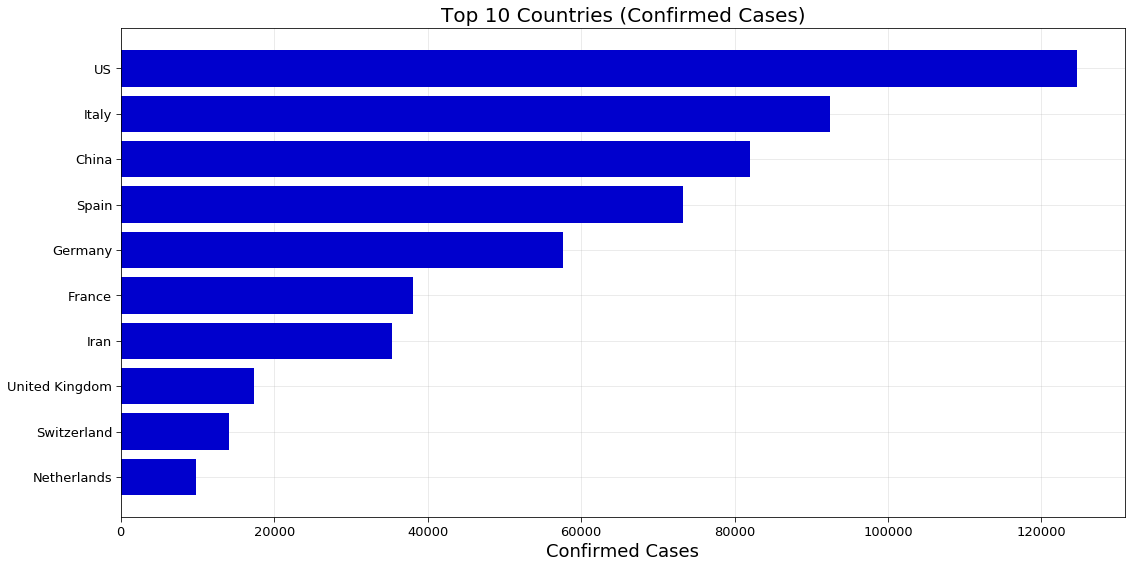

In [56]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="mediumblue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Confirmed Cases).png')

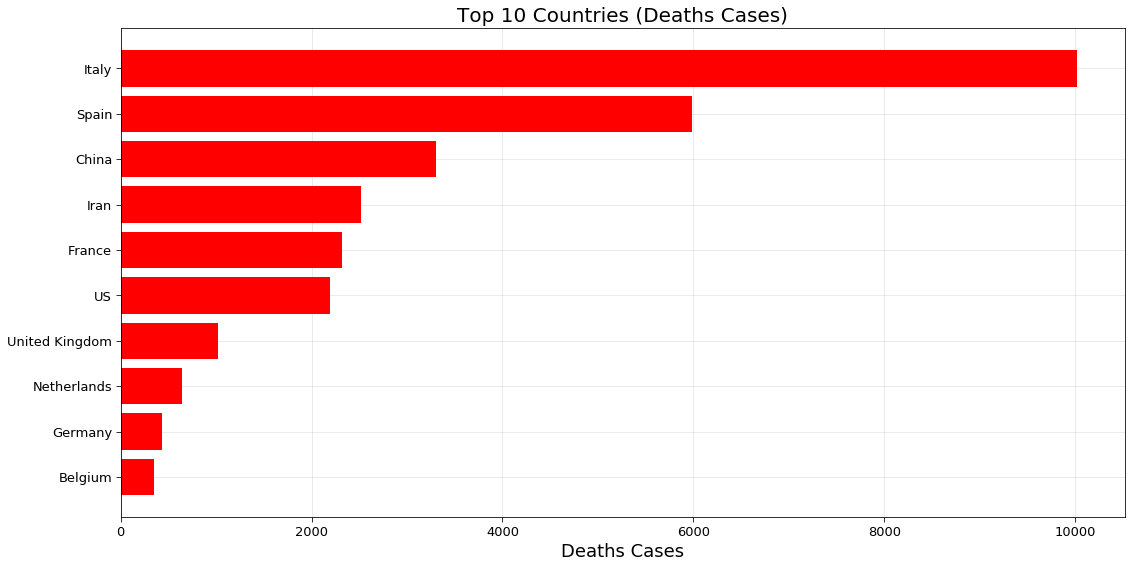

In [54]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Deaths Cases).png')

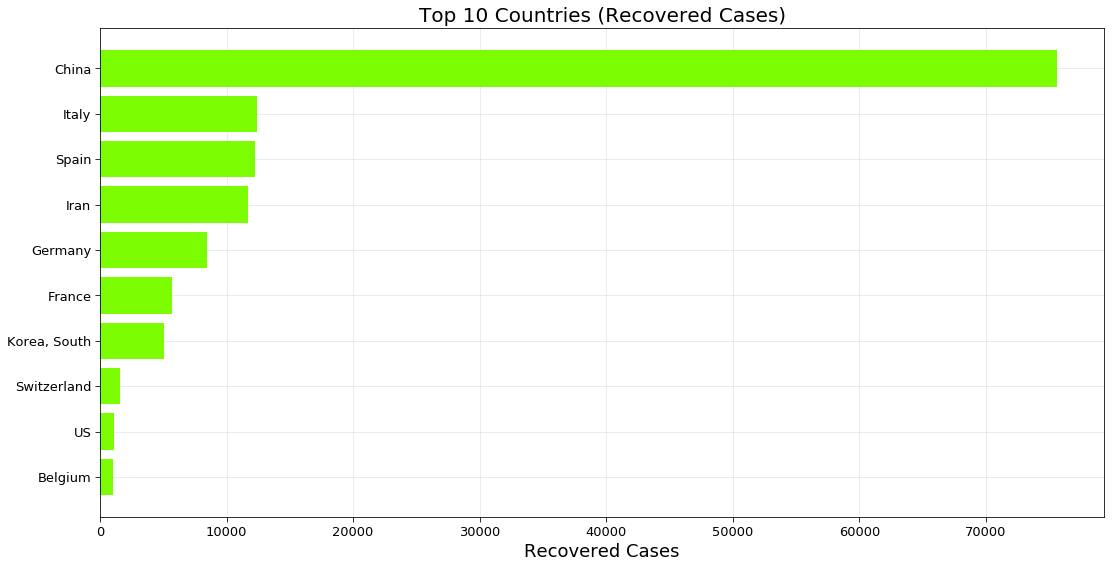

In [58]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Recovered')["Recovered"].index[-10:],df_countries_cases.sort_values('Recovered')["Recovered"].values[-10:],color="lawngreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Recovered Cases).png')

In [41]:
df_countries_cases.corr().style.background_gradient(cmap='OrRd')

,Confirmed,Deaths,Recovered,Active
Confirmed,1,0.794713,0.571234,0.686167
Deaths,0.794713,1,0.475882,0.841328
Recovered,0.571234,0.475882,1,0.27987
Active,0.686167,0.841328,0.27987,1


In [43]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['Country/Region']+"</h5>"+
                    "<div style='text-align:center;'>"+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map

In [44]:
df_countries = df_confirmed.groupby(['Country/Region']).sum()

In [45]:
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending=False)

In [46]:
countries = df_countries[df_countries[df_countries.columns[-1]] >= 2000].index

In [60]:
countries

Index(['US', 'Italy', 'China', 'Spain', 'Germany', 'France', 'Iran',
       'United Kingdom', 'Switzerland', 'Netherlands', 'Korea, South',
       'Belgium', 'Austria', 'Turkey', 'Canada', 'Portugal', 'Norway',
       'Brazil', 'Australia', 'Israel', 'Sweden', 'Czechia', 'Ireland',
       'Denmark', 'Malaysia'],
      dtype='object', name='Country/Region')

In [85]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["Country/Region",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19 Cases for "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days

In [75]:
df_countries.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,37.0902,-95.7129,1,1,2,2,5,5,5,5,...,13677,19100,25489,33276,43847,53740,65778,83836,101657,121478
Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,...,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472
China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,6087,...,81156,81250,81305,81435,81498,81591,81661,81782,81897,81999
Spain,40.0000,-4.0000,0,0,0,0,0,0,0,0,...,17963,20410,25374,28768,35136,39885,49515,57786,65719,73235
Germany,51.0000,9.0000,0,0,0,0,0,1,4,4,...,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695


In [70]:
for i,country in enumerate(countries):
    print(country)

US
Italy
China
Spain
Germany
France
Iran
United Kingdom
Switzerland
Netherlands
Korea, South
Belgium
Austria
Turkey
Canada
Portugal
Norway
Brazil
Australia
Israel
Sweden
Czechia
Ireland
Denmark
Malaysia


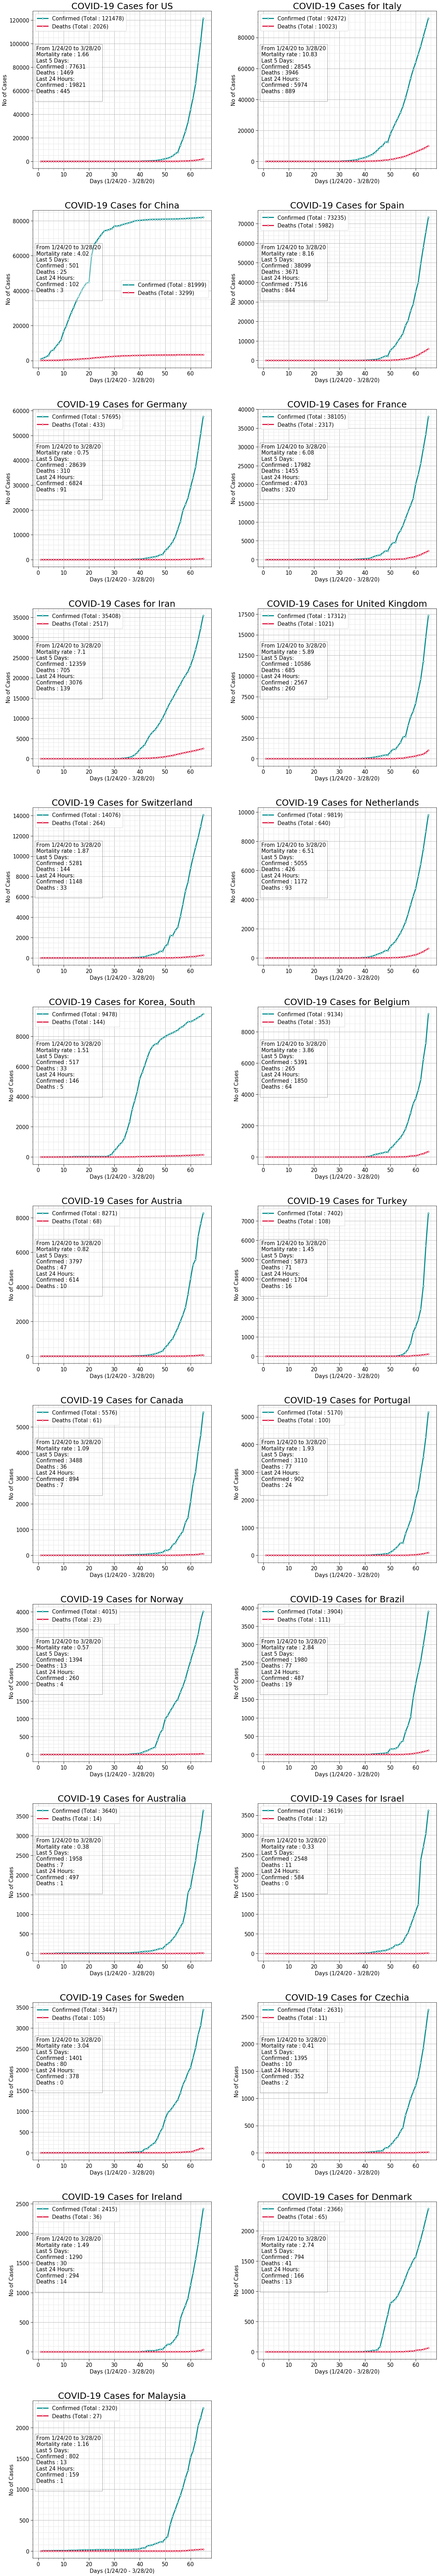

<Figure size 432x288 with 0 Axes>

In [89]:
df_countries = df_countries.groupby(['Country/Region']).sum()
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending=False)
countries = df_countries[df_countries[df_countries.columns[-1]]>=2000].index
cols = 2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(20,8*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(df_confirmed,df_deaths,country=country,figure=[f,rows,cols,i+1])
    
plt.show()

plt.savefig("Top 25 countries latest trends")

COVID INDIA

In [163]:
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()

In [164]:
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")

In [170]:
df_india = df_india.sort_values('confirmed',ascending=False)
df_india = df_india[['confirmed','active','recovered','deaths']]

In [181]:
total = df_india.sum()
total.name = "Total"

pd.DataFrame(total).transpose().style.background_gradient(cmap='prism',axis=1).to_excel('India_COVID19_totalData.xlsx',engine='openpyxl')

In [184]:
df_india.head()

,confirmed,active,recovered,deaths
state,,,,
Maharashtra,193,161,25,7
Kerala,182,169,12,1
Karnataka,81,73,5,3
Uttar Pradesh,69,58,11,0
Telangana,67,65,1,1


In [172]:
df_india_styled = df_india.style.background_gradient('prism')


In [180]:
df_india_styled.to_excel('India_COVID19_data.xlsx',engine='openpyxl')

In [186]:
# Adding Location data (Latitude,Longitude)
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397]    
}
df_india["Lat"] = ""
df_india["Long"] = ""
for index in df_india.index :
    df_india.loc[df_india.index == index,"Lat"] = locations[index][0]
    df_india.loc[df_india.index == index,"Long"] = locations[index][1]

In [187]:
url = "https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/master/Indian_States"
state_json = requests.get(url).json()
india = folium.Map(location=[23,80], zoom_start=4,max_zoom=6,min_zoom=4,height=500,width="80%")
for i in range(0,len(df_india[df_india['confirmed']>0].index)):
    folium.Circle(
        location=[df_india.iloc[i]['Lat'], df_india.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_india.iloc[i].name+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_india.iloc[i]['confirmed'])+"</li>"+
        "<li>Active:   "+str(df_india.iloc[i]['active'])+"</li>"+
        "<li>Recovered:   "+str(df_india.iloc[i]['recovered'])+"</li>"+
        "<li>Deaths:   "+str(df_india.iloc[i]['deaths'])+"</li>"+
        
        "<li>Mortality Rate:   "+str(np.round(df_india.iloc[i]['deaths']/(df_india.iloc[i]['confirmed']+1)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int(np.log2(df_india.iloc[i]['confirmed']+1)))*15000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(india)

india